# Chapter 3 Classification

In [92]:
import numpy as np

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5, 0, 4, ..., 4, 5, 6], dtype=int8))

In [93]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [94]:
# Sort into training and testing instances
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
    
sort_by_target(mnist)

Label: 5


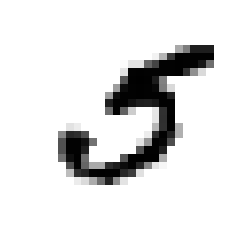

In [135]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Set seed for reproducibility
np.random.seed(42)

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = plt.cm.binary,
          interpolation='nearest');
plt.axis('off');
print(f'Label: {y[36000]}')

In [136]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# Shuffle so not all 0s, 1s, etc. are next to each other
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Binary Classifiers

In [137]:
# Let's create a binary classifier for the digit we saw above
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [138]:
from sklearn.linear_model import SGDClassifier

# Classifier detects whether digit is a 5
sgd_clfr = SGDClassifier(max_iter=5, random_state=42)
sgd_clfr.fit(X_train, y_train_5)

# Test on randomly chosen digit
sgd_clfr.predict([some_digit])

/home/hussain/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


array([ True])

In [139]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clfr, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

/home/hussain/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/hussain/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/hussain/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters ha

array([[53272,  1307],
       [ 1077,  4344]])

In [140]:
from sklearn.metrics import precision_score, recall_score, f1_score

# How many instances labelled positive are true positives
print(f'Precision: {precision_score(y_train_5, y_train_pred)}')
# How many positive instances we detected
print(f'Recall: {recall_score(y_train_5, y_train_pred)}')
# Harmonic mean of precision and recall
print(f'F1 score: {f1_score(y_train_5, y_train_pred)}')

Precision: 0.7687135020350381
Recall: 0.801328168234643
F1 score: 0.7846820809248555


The F1 score is not always a good measure of model performance given your use case, since it favors classifiers with similar precision and recall, but in some cases one is more desirable or important than the other. 

We can control our precision and recall more carefully by outputting decision scores instead of classifications and changing the threshold which the scores use to make predictions.

In [141]:
y_scores = cross_val_predict(sgd_clfr, X_train, y_train_5, cv=3,
                            method='decision_function')
y_scores[:5]

/home/hussain/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/hussain/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/hussain/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters ha

array([ -434076.49813641, -1825667.15281624,  -767086.76186905,
        -482514.55006702,  -466416.8082872 ])

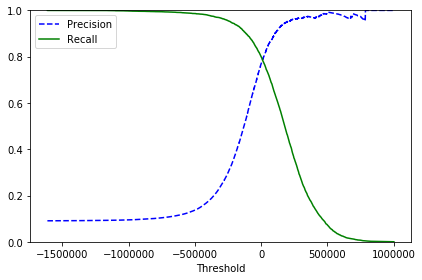

In [142]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='best')
    plt.ylim([0,1])

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.tight_layout()

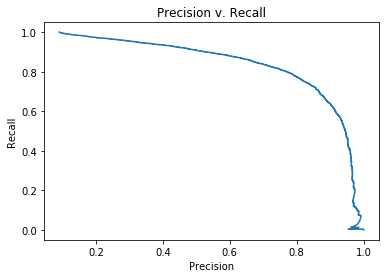

In [143]:
plt.plot(precisions, recalls);
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision v. Recall');

We can create predictions corresponding to any threshold we like. For example, let's try to use the first precision and recall vs threshold plot above to find a threshold where precision and recall are more equal.

(-30000, 30000)

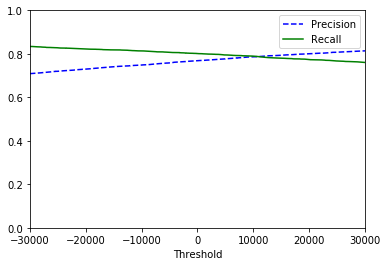

In [168]:
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.xlim([-30000,30000])

In [169]:
y_train_pred_adjusted = (y_scores > 10000)

print(f'Precision: {precision_score(y_train_5, y_train_pred_adjusted)}')
print(f'Recall: {recall_score(y_train_5, y_train_pred_adjusted)}')

Precision: 0.7864755604557148
Recall: 0.7895222283711493


We indeed see that precision and recall have come closer together.

### ROC Curves

ROC AUC score: 0.9624496555967156


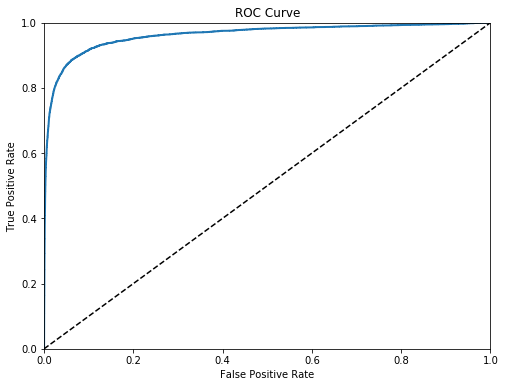

In [172]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

plt.figure(figsize=(8, 6));
plot_roc_curve(fpr, tpr)

print(f'ROC AUC score: {roc_auc_score(y_train_5, y_scores)}')

Let's also try using a Random Forest classifier.

In [174]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
# Output probabilities 
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method='predict_proba')

ROC AUC score: 0.9931243366003829


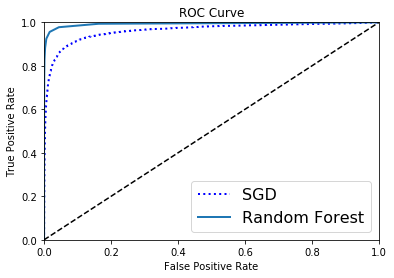

In [175]:
# Use probability of positive class as score 
y_scores_forest = y_probas_forest[:,1] 

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16);
print(f'ROC AUC score: {roc_auc_score(y_train_5, y_scores_forest)}')

We can see that Random Forest performs better than does our SGD classifier (when using the ROC AUC score as our metric).

## Multiclass Classification

With multiple classes, two approaches still using binary classifiers is to have a classifier for every output (one-versus-all or OvA strategy) or a classifier for every pair of outputs (one-versus-one or OvO strategy). OvA is usually preferred, but for algorithms that don't scale well, OvO will run much faster since it only needs to be run on the subset of data for the two classes it's trying to distinguish.

In [176]:
# SGD classifier defaults to OvA given multinomial output
sgd_clfr.fit(X_train, y_train)
# Check whether it predicts 5
sgd_clfr.predict([some_digit])

/home/hussain/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


array([5], dtype=int8)

Let's take a look at the scores to confirm that it's indeed using OvA.

In [178]:
some_digit_scores = sgd_clfr.decision_function([some_digit])
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [180]:
# Check which class the highest score corresponds to
max_score_idx = np.argmax(some_digit_scores)
sgd_clfr.classes_[max_score_idx]

5

We can also use an OvO strategy with the SGD classifier, or any other binary classifier we choose.

In [192]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings

# Supress convergence warnings
def fxn():
    warnings.warn("convergence", ConvergenceWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

    ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=10, tol=1e-3))
    ovo_clf.fit(X_train, y_train)
    ovo_clf.predict([some_digit])
    # Check that there are [(10 X 9) / 2] = 45 scores for each pair of classes
    print(len(ovo_clf.estimators_))

45


Random Forests can deal with multiple classes without using OvA or OvO.

In [194]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

## Error Analysis

Let's visualize a confusion matrix to see what kind of errors our classifier makes.

/home/hussain/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/hussain/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/home/hussain/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters ha

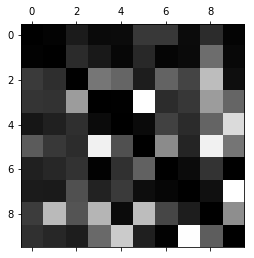

In [196]:
from sklearn.preprocessing import StandardScaler

# First scale our data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

y_train_pred = cross_val_predict(sgd_clfr, X_train_scaled, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_train_pred)
# Calculate number of instances of each class
row_sums = conf_matrix.sum(axis=1, keepdims=True)
# Divide each error count by size of true class to normalize matrix
norm_conf_mx = conf_matrix / row_sums
# Fill diagonal of matrix with 0s
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray);

Rows correspond to true classes and columns correspon to predictions, and the brighter an entry, the higher the error rate. We can see that 0s, 1s, and 6s have pretty good classifications, while 5s and 8s are prone to being misclassified. 

We can also look directly at what the digits that are being misclassified look like.

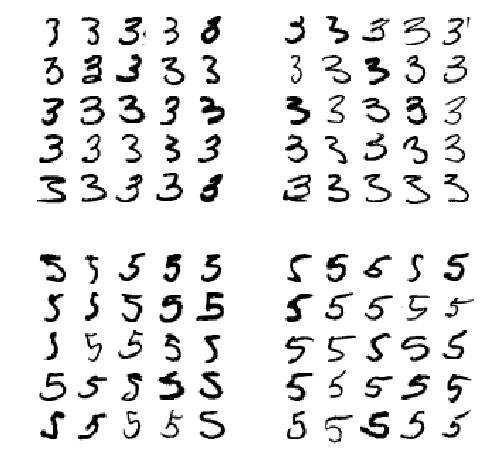

In [200]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

def plot_misclassifications(class_a=3, class_b=5, images_per_row=5):
    
    #X_jk corresponds to class j being classified as class k
    X_aa = X_train[(y_train == class_a) & (y_train_pred == class_a)]
    X_ab = X_train[(y_train == class_a) & (y_train_pred == class_b)]
    X_ba = X_train[(y_train == class_b) & (y_train_pred == class_a)]
    X_bb = X_train[(y_train == class_b) & (y_train_pred == class_b)]
    
    plt.figure(figsize=(8,8))
    plt.subplot(221); plot_digits(X_aa[:images_per_row**2], images_per_row)
    plt.subplot(222); plot_digits(X_ab[:images_per_row**2], images_per_row)
    plt.subplot(223); plot_digits(X_ba[:images_per_row**2], images_per_row)
    plt.subplot(224); plot_digits(X_bb[:images_per_row**2], images_per_row)
    
plot_misclassifications()

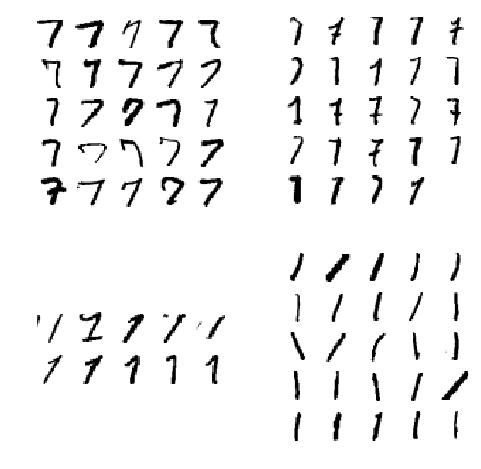

In [201]:
plot_misclassifications(7, 1)

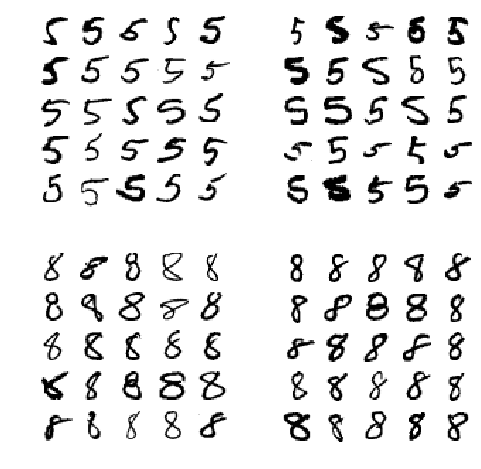

In [202]:
plot_misclassifications(5, 8)

Looking at these misclassifications and the types of errors our model is making can help us improve it further, by, for example, adding more examples of the misclassified digits or doing some image processing depending on how our algorithm works. 

## Multilabel Classification

There are also cases where our output can have multiple labels. Let's consider this type of problem with our handwritten digits dataset, although it will be a slightly artificial example.

In [204]:
from sklearn.neighbors import KNeighborsClassifier

# Large/small label
y_train_large = (y_train >= 7)
# Odd/even label
y_train_odd = (y_train % 2 == 1)
# Combined label
y_train_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_multilabel)
knn_clf.predict([some_digit])

array([[False,  True]])

We can see that our classifier predicted 5 was not large and was odd. Evaluating multilabel classifiers is more involved than evaluating our previous classifiers has been. One method is the average F1 score across labels.

In [205]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train_multilabel, y_train, cv=3)
f1_score(y_train_knn_pred, y_train_multilabel, average='macro')

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets